In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def minmax_normalization(image):
    image = image.astype(np.float32)
    normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))
    return (normalized_image*255).astype(np.uint8)

In [3]:
def gray_world_assumption(image):
    # Calculate the average color values for each channel
    avg_color = np.mean(image, axis=(0, 1))

    # Calculate scaling factors
    max_avg_color = np.max(avg_color)
    scaling_factors = max_avg_color / avg_color

    # Apply scaling to each pixel
    normalized_image = image * scaling_factors

    # Clip values to ensure they are within the valid range [0, 255]
    normalized_image = np.clip(normalized_image, 0, 255).astype(np.uint8)

    return normalized_image

In [4]:
def normalize_hue(hue_channel, target_range=(0, 360)):
    min_hue, max_hue = target_range
    # Handle cyclic nature of Hue (0 to 360)
    hue_channel = (hue_channel - min_hue) % 360
    
    normalized_hue = (hue_channel - min_hue) / (max_hue - min_hue)
    normalized_hue = normalized_hue * (max_hue - min_hue) + min_hue
    return normalized_hue

def normalize_saturation_value(saturation_channel, value_channel, target_range=(0, 255)):
    min_val, max_val = target_range
    normalized_saturation = (saturation_channel - np.min(saturation_channel)) / (np.max(saturation_channel) - np.min(saturation_channel))
    normalized_value = (value_channel - np.min(value_channel)) / (np.max(value_channel) - np.min(value_channel))
    
    normalized_saturation = normalized_saturation * (max_val - min_val) + min_val
    normalized_value = normalized_value * (max_val - min_val) + min_val
    
    return normalized_saturation, normalized_value

def convert_to_bgr(normalized_hue, normalized_saturation, normalized_value):
    normalized_hsv = np.stack([normalized_hue, normalized_saturation, normalized_value], axis=-1)
    normalized_bgr = cv2.cvtColor(normalized_hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)
    return normalized_bgr

def hsv_normalization(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv_image = hsv_image.astype(np.float32)
    normalized_hue = normalize_hue(hsv_image[:, :, 0])
    normalized_saturation, normalized_value = normalize_saturation_value(hsv_image[:, :, 1], hsv_image[:, :, 2])
    # Convert back to BGR
    normalized_image = convert_to_bgr(normalized_hue, normalized_saturation, normalized_value)

    return normalized_image
    

In [5]:
def white_balance(image):
    image = image.astype(np.float32)
    
    # Calculate average values for each color channel
    avg_r = np.mean(image[:, :, 2])
    avg_g = np.mean(image[:, :, 1])
    avg_b = np.mean(image[:, :, 0])

    # Calculate scaling factors
    scale_r = avg_g / avg_r
    scale_b = avg_g / avg_b

    # Apply scaling to each channel
    balanced_image = np.zeros_like(image, dtype=np.float32)
    balanced_image[:, :, 2] = image[:, :, 2] * scale_r
    balanced_image[:, :, 0] = image[:, :, 0] * scale_b
    balanced_image[:, :, 1] = image[:, :, 1]

    # Clip values to ensure they are within the valid range [0, 255]
    balanced_image = np.clip(balanced_image, 0, 255).astype(np.uint8)

    return balanced_image


In [6]:
def show_image(image):
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

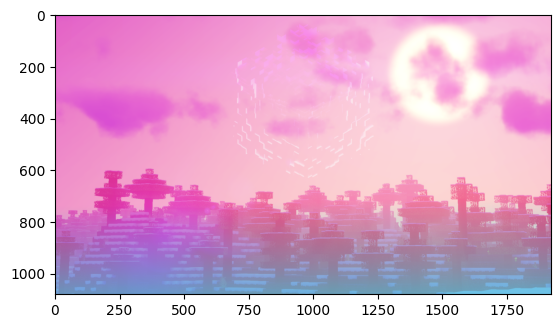

In [7]:
# Read an image using OpenCV
image = cv2.imread('./ariamath.png')
show_image(image)

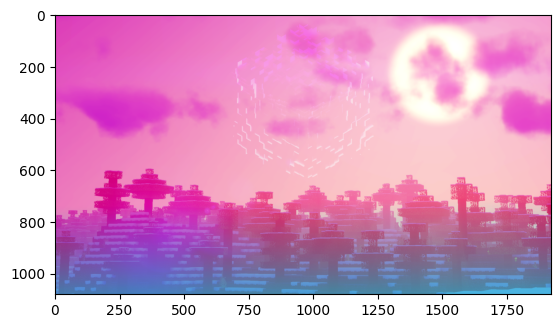

In [8]:
# min max normalization
show_image(minmax_normalization(image))

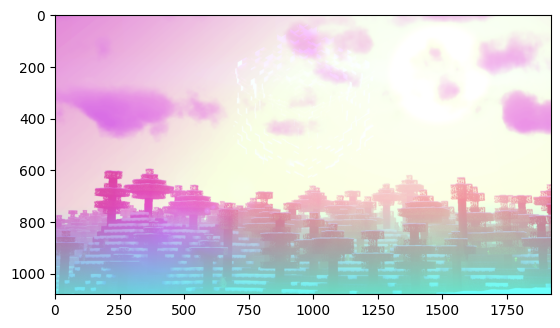

In [9]:
show_image(gray_world_assumption(image))

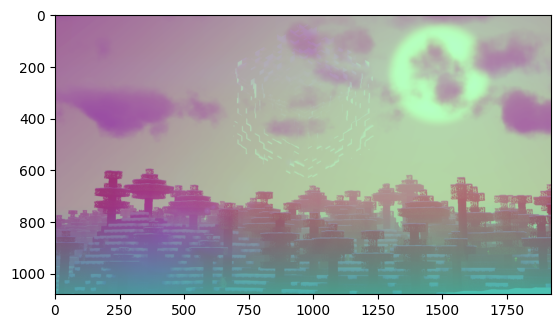

In [14]:
show_image(white_balance(image))

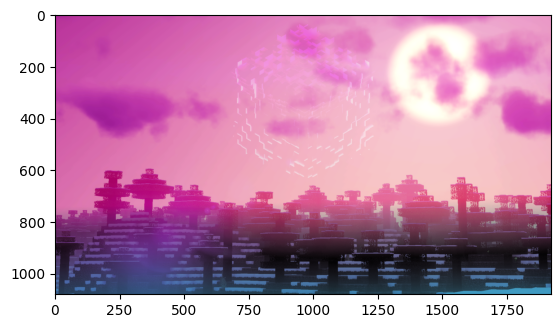

In [11]:
show_image(hsv_normalization(image))

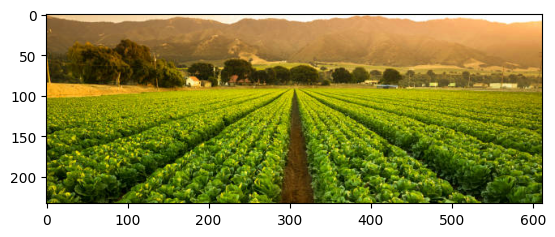

In [12]:
show_image(hsv_normalization(cv2.imread("garden.jpg")))

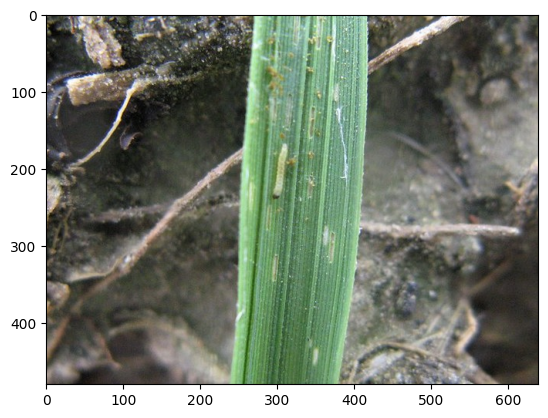

In [13]:
show_image(hsv_normalization(cv2.imread("./leaf2.jpg")))